# Load and preprocess data
## Imports

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import random

# Images
from PIL import Image
from matplotlib import image
from IPython.display import display

## Collected data overview

In [2]:
data_path = os.path.join(os.getcwd(), "data")
print(os.listdir(data_path))

['Face Images with Marked Landmark Point', 'Facial Keypoints', 'X.npy', 'X_small.npy', 'Y.npy', 'Y_small.npy']


## Utility functions

In [14]:
def resize_picture(img_array, new_size=78):
    """Resize picture into given size
    
    returns trasformed picture and scale used during transformation
    """
    img = Image.fromarray(img_array)
    # resize image
    orginal_size = img.size
    img.thumbnail((new_size, new_size))
    # scale
    scale_x = img.size[0] / orginal_size[0]
    scale_y = img.size[1] / orginal_size[1]
    image_arr = np.asarray(img)
    # Add padding
    data = np.zeros((new_size, new_size, 3))
    data[:image_arr.shape[0], :image_arr.shape[1], :] = image_arr
    return data, scale_x, scale_y

def preprocess_picture(file_name, new_size=78):
    """Transform given picture into new_size * new_size array
    
    returns trasformed picture and scale used during transformation
    """
    img = Image.open(file_name)
    # Covert into RGB
    background = Image.new("RGB", img.size, (255, 255, 255))
    background.paste(img, mask=img.split()[3])
    img = background
    return resize_picture(np.asarray(img), new_size)
    
        

def plot_face(x, y):
    """Plot face with marked landmarks.
    
    Where y is a list of landmarks coordinates
    and x is numpy array reprezenting a picture
    """
    fig, ax = plt.subplots(sharex=True,sharey=True)
    ax.imshow(x[:,:,:])
    for i in range(len(y)):
        ax.scatter(y[i][0], y[i][1], marker='X', c='r', s=10)


def plot_face_center(x, coordinates):
    """Plot face with marked center.
    
    Where x is numpy array reprezenting a picture
    """

    fig, ax = plt.subplots(sharex=True,sharey=True)
    ax.imshow(x[:,:,:].astype('uint8'))
    ax.scatter(coordinates[0], coordinates[1], marker='X', c='r', s=10)


def plot_faces(X, Y, rows_number=5, columns_number=5):
    """Plot rows_number * columns_number faces with marked center.
    
    Faces are choosen randomly.
    """
    n = 0
    irand=np.random.choice(Y.shape[0],rows_number*columns_number)
    fig, ax = plt.subplots(rows_number,columns_number,sharex=True,sharey=True,figsize=[rows_number*2,columns_number*2])
    for row in range(rows_number):
        for col in range(columns_number):
            ax[row,col].imshow(X[irand[n],:,:,:].astype('uint8'))
            ax[row,col].scatter(Y[irand[n],0], Y[irand[n],1], marker='X',c='r',s=10)
            ax[row,col].set_xticks(())
            ax[row,col].set_yticks(())
            ax[row,col].set_title('image index = %d' %(irand[n]),fontsize=10)
            n += 1    

## Facial Keypoints dataset
### Load data

In [4]:
curr_data_path = os.path.join(data_path, "Facial Keypoints")
print(os.listdir(curr_data_path))
train_labels_df = pd.read_csv(os.path.join(curr_data_path, "training_frames_keypoints.csv"))
test_labels_df = pd.read_csv(os.path.join(curr_data_path, "test_frames_keypoints.csv"))
train_labels_df.rename(columns = {"Unnamed: 0": "file_name"}, inplace=True)
test_labels_df.rename(columns = {"Unnamed: 0": "file_name"}, inplace=True)
# Fist look at avabile labels
print(train_labels_df.head(2))

['test', 'test_frames_keypoints.csv', 'training', 'training_frames_keypoints.csv']
               file_name     0     1     2      3     4      5     6      7  \
0      Luis_Fonsi_21.jpg  45.0  98.0  47.0  106.0  49.0  110.0  53.0  119.0   
1  Lincoln_Chafee_52.jpg  41.0  83.0  43.0   91.0  45.0  100.0  47.0  108.0   

      8  ...   126    127   128    129   130    131   132    133   134    135  
0  56.0  ...  83.0  119.0  90.0  117.0  83.0  119.0  81.0  122.0  77.0  122.0  
1  51.0  ...  85.0  122.0  94.0  120.0  85.0  122.0  83.0  122.0  79.0  122.0  

[2 rows x 137 columns]


### Change file names into absolute path to file

In [5]:
train_labels_df['file_name'] = train_labels_df['file_name'].apply(lambda x: os.path.join(curr_data_path, "training",  x))
test_labels_df['file_name'] = test_labels_df['file_name'].apply(lambda x: os.path.join(curr_data_path, "test",  x))
print(train_labels_df['file_name'][0])
print(test_labels_df['file_name'][0])

C:\Users\ciche\OneDrive\Pulpit\solvro\Face-Center-Detection\data\Facial Keypoints\training\Luis_Fonsi_21.jpg
C:\Users\ciche\OneDrive\Pulpit\solvro\Face-Center-Detection\data\Facial Keypoints\test\James_Wolfensohn_00.jpg


### Quick peak at avaible data

RGBA
(260, 323)


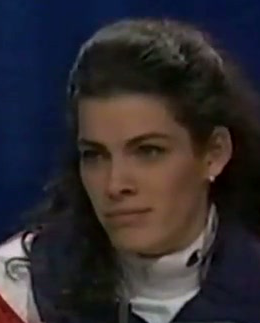

In [6]:
file_name = train_labels_df['file_name'][125]
img = Image.open(file_name)
print(img.mode)
print(img.size)
display(img)

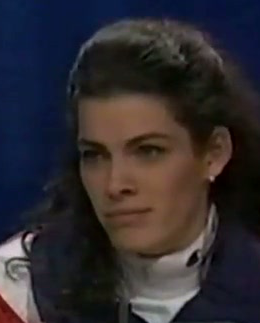

In [7]:
# Convert into RGB 
background = Image.new("RGB", img.size, (255, 255, 255))
background.paste(img, mask=img.split()[3])
img = background
display(img)

In [8]:
# As numpy array
data = np.asarray(img)
print(data.shape)

(323, 260, 3)


0       78
1      155
2       78
3      173
4       82
      ... 
131    214
132    122
133    218
134    113
135    218
Name: 125, Length: 136, dtype: object
78.0 155.0
68


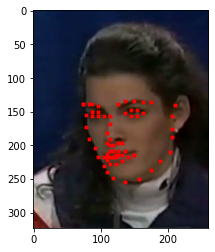

In [9]:
labels = train_labels_df.iloc[125,1:]
print(labels)
# extract markers coordinates
markers = [labels[i: i+2]  for i in range(0, len(labels), 2)]
print(markers[0][0], markers[0][1])
print(len(markers))
plot_face(data, markers)

### Extract labels corresponding to face center

109.0 182.0
Our target will be 30-th point


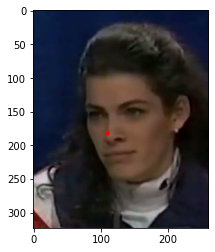

In [10]:
i = 29
fig, ax = plt.subplots(sharex=True,sharey=True)
ax.imshow(data[:,:,:])
print(markers[i][0], markers[i][1])
ax.scatter(markers[i][0], markers[i][1], marker='X', c='r', s=10)
print("Our target will be 30-th point")

In [11]:
# Mix training and test data, we will split them manualy later
labels_df = pd.concat([train_labels_df, test_labels_df], ignore_index=True)
print(labels_df.head(2))

                                           file_name     0     1     2      3  \
0  C:\Users\ciche\OneDrive\Pulpit\solvro\Face-Cen...  45.0  98.0  47.0  106.0   
1  C:\Users\ciche\OneDrive\Pulpit\solvro\Face-Cen...  41.0  83.0  43.0   91.0   

      4      5     6      7     8  ...   126    127   128    129   130    131  \
0  49.0  110.0  53.0  119.0  56.0  ...  83.0  119.0  90.0  117.0  83.0  119.0   
1  45.0  100.0  47.0  108.0  51.0  ...  85.0  122.0  94.0  120.0  85.0  122.0   

    132    133   134    135  
0  81.0  122.0  77.0  122.0  
1  83.0  122.0  79.0  122.0  

[2 rows x 137 columns]


In [12]:
# Extract columns corresponding to face center
labels_df = labels_df[['file_name', '58', '59']]
labels_df.rename(columns = {'58': "x_coord", '59':"y_coord"}, inplace=True)
print(labels_df.head(2))

                                           file_name  x_coord  y_coord
0  C:\Users\ciche\OneDrive\Pulpit\solvro\Face-Cen...     79.0    102.0
1  C:\Users\ciche\OneDrive\Pulpit\solvro\Face-Cen...     83.0    107.0


### Choose fixed picture size

In [17]:
sizes = {
    'x':{i:0 for i in range(500)},
    'y':{i:0 for i in range(500)}
}
for index, row in labels_df.iterrows():
    file_name = row['file_name']
    img = Image.open(file_name)
    sizes['x'][img.size[0]] += 1
    sizes['y'][img.size[1]] += 1

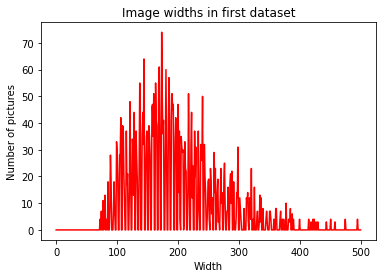

In [18]:
# Its helpfull to visulize avalible sizes
x_axis = [i for i in range(500)]
x_sizes = [sizes['x'][i] for i in range(500)]
plt.plot(x_axis, x_sizes, 'r-')
plt.title("Image widths in first dataset")
plt.ylabel('Number of pictures')
plt.xlabel('Width')
plt.show()

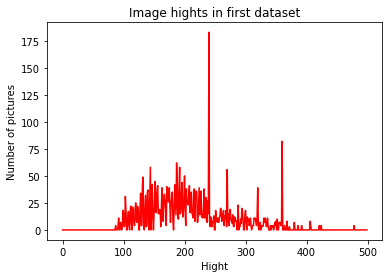

In [19]:
y_sizes = [sizes['y'][i] for i in range(500)]
plt.plot(x_axis, y_sizes, 'r-')
plt.title("Image hights in first dataset")
plt.ylabel('Number of pictures')
plt.xlabel('Hight')
plt.show()

In [13]:
# Usually scaling pictures into smaller ones
# help reduce the loss of informations
new_picture_size = 78

### Preprocess data

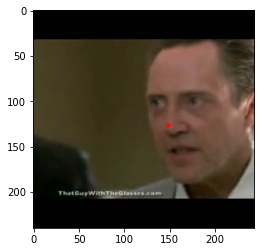

In [15]:
# Example 1
row = labels_df.iloc[9,:]
file_name = row['file_name']
x_cord = row['x_coord']
y_cord = row['y_coord']
img = Image.open(file_name)
plot_face_center(np.asarray(img), coordinates=[x_cord, y_cord])

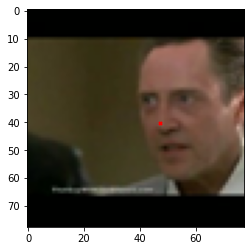

In [16]:
img_arr, x_scale, y_scale = preprocess_picture(file_name, new_size=new_picture_size)
plot_face_center(img_arr, coordinates=[x_cord * x_scale, y_cord * y_scale])

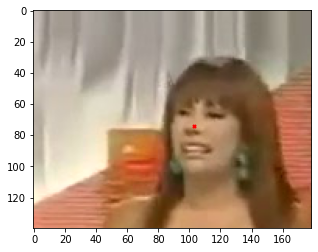

In [17]:
# Example 2
row = labels_df.iloc[7,:]
file_name = row['file_name']
x_cord = row['x_coord']
y_cord = row['y_coord']
img = Image.open(file_name)
plot_face_center(np.asarray(img), coordinates=[x_cord, y_cord])

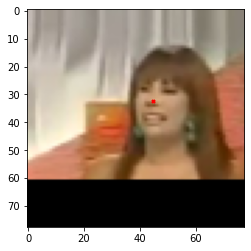

In [18]:
img_arr, x_scale, y_scale = preprocess_picture(file_name, new_size=new_picture_size)
plot_face_center(img_arr, coordinates=[x_cord * x_scale, y_cord * y_scale])

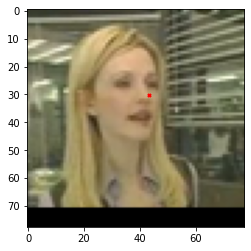

In [19]:
# Number of pictures
m = len(labels_df)
X = np.zeros((m, new_picture_size, new_picture_size, 3))
Y = np.zeros((m, 2))

for index, row in labels_df.iterrows():
    file_name = row['file_name']
    picure_arr, scale_x, scale_y = preprocess_picture(file_name)
    x_cord = row['x_coord'] * scale_x
    y_cord = row['y_coord'] * scale_y
    X[index, :] = picure_arr
    Y[index, 0] = x_cord
    Y[index, 1] = y_cord

plot_face_center(X[33, :], [Y[33, 0], Y[33, 1]])

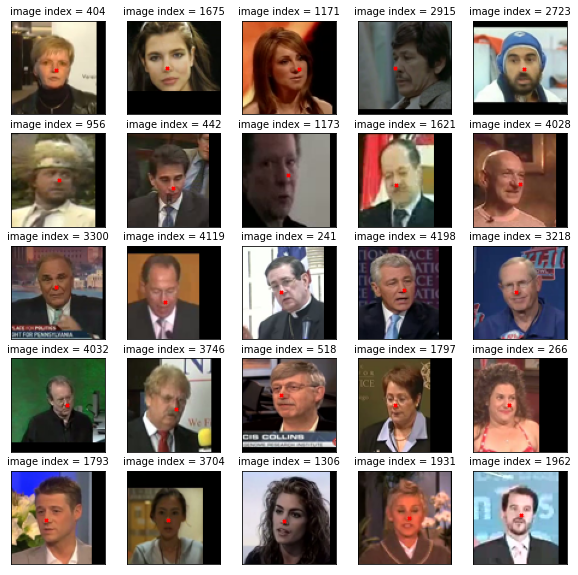

In [20]:
plot_faces(X, Y)

### Data Augmentation

#### Select part of image
In our dataset, most examples have face center, well in the center of the image... Lets try to fix that!

In [21]:
def select_image_part(file_name, coordinates, min_size=78):
    """Capture part of image of size at least min_size * min_size
    
    Returns suc, img, cord
    Where:
    suc -> True if selection was successfull, False if not
    img_arr -> new image ass array if selection was succesfull
    coord -> new coordinates if selection was succesfull
    """ 
    img = Image.open(file_name)
    # Covert into RGB
    background = Image.new("RGB", img.size, (255, 255, 255))
    background.paste(img, mask=img.split()[3])
    img = background
    # Check is large enought for selection
    if img.size[0] < min_size + 20 or img.size[1] < min_size + 20:
        return False, None, None
    new_image_width = random.randint(min_size, img.size[0] - 10)
    new_image_height = random.randint(min_size, img.size[1] - 10)
    x_shift = random.randint(0, img.size[0] - new_image_width - 1)
    y_shift = random.randint(0, img.size[1] - new_image_height - 1)
    crop_rectangle = (x_shift, y_shift, x_shift + new_image_width, y_shift + new_image_height)
    # Check if face centre is in new picture
    if coordinates[0] < x_shift + 5 or coordinates[0] > x_shift + new_image_width - 5:
        return False, None, None
    if coordinates[1] < y_shift + 5 or coordinates[1] > y_shift + new_image_width - 5:
        return False, None, None
    img = img.crop(crop_rectangle)
    img_arr = np.asarray(img)
    return True, img_arr, [coordinates[0] - x_shift, coordinates[1] - y_shift]

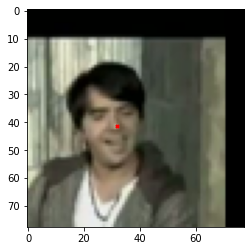

In [22]:
# Example 1
plot_face_center(X[0], Y[0])

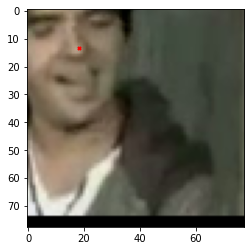

In [26]:
suc, img_arr, coord = select_image_part(labels_df['file_name'][0], [labels_df['x_coord'][0], labels_df['y_coord'][0]])
if suc:
    img_arr, x_scale, y_scale = resize_picture(img_arr)
    plot_face_center(img_arr, [coord[0] * x_scale, coord[1] * y_scale])

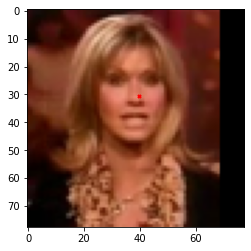

In [27]:
# Example 2
plot_face_center(X[500], Y[500])

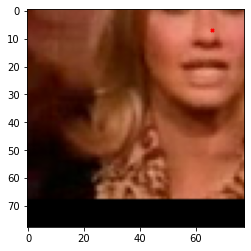

In [30]:
i = 500
suc, img_arr, coord = select_image_part(labels_df['file_name'][i], [labels_df['x_coord'][i], labels_df['y_coord'][i]])
if suc:
    img_arr, x_scale, y_scale = resize_picture(img_arr)
    plot_face_center(img_arr, [coord[0] * x_scale, coord[1] * y_scale])

In [31]:
print(X.shape, Y.shape)
new_pictures = []
new_coordinates = []
# Try to generate 4 pictures from orginal
tries_number = 4
for index, row in labels_df.iterrows():
    for _ in range(tries_number):
        suc, img_arr, coord = select_image_part(labels_df['file_name'][index], [labels_df['x_coord'][index], labels_df['y_coord'][index]])
        if suc:
            img_arr, x_scale, y_scale = resize_picture(img_arr)
            new_pictures.append(img_arr)
            new_coordinates.append([coord[0] * x_scale, coord[1] * y_scale])            
        
S_X = np.zeros((len(new_pictures), new_picture_size, new_picture_size, 3))
S_Y = np.zeros((len(new_pictures), 2))
print(len(new_pictures))
for i in range(len(new_pictures)):
    S_X[i, :] = new_pictures[i]
    S_Y[i, :] = new_coordinates[i]
X = np.concatenate((X, S_X))
Y = np.concatenate((Y, S_Y))
print(X.shape, Y.shape)

(4232, 78, 78, 3) (4232, 2)
13493
(17725, 78, 78, 3) (17725, 2)


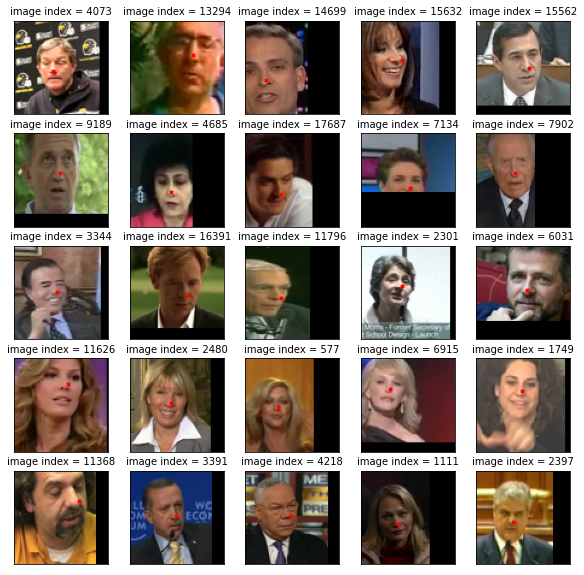

In [32]:
plot_faces(X, Y)

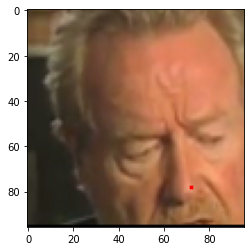

In [273]:
# Example 3
x = X[6002, :].astype(np.uint8)
plot_face_center(x, Y[6002, :])

#### Mirroring

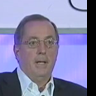

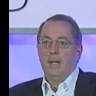

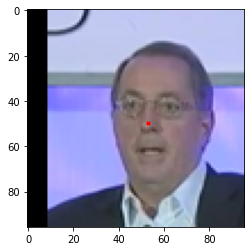

In [176]:
# Example 1
img = Image.fromarray(X[10, :].astype(np.uint8))
display(img)
img = img.transpose(Image.FLIP_LEFT_RIGHT)
display(img)
x_cord = Y[10, 0]
y_cord = Y[10, 1]
plot_face_center(np.asarray(img), [96 - x_cord, y_cord])

In [33]:
def mirror(x, coordinates):
    """Flip horizontally array x
    
    Returns flipped array and point correspoinding to
    marked point in orginal array
    """
    img = Image.fromarray(x.astype(np.uint8))
    img = img.transpose(Image.FLIP_LEFT_RIGHT)
    img_arr = np.asarray(img)
    
    return img_arr, [img_arr.shape[0] - coordinates[0], coordinates[1]]

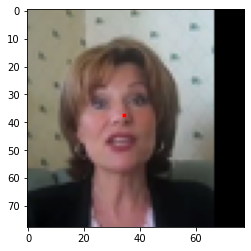

In [34]:
# Example 2
x = X[11, :].astype(np.uint8)
plot_face_center(x, Y[11, :])

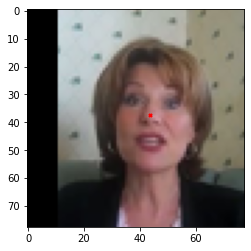

In [35]:
x, coordinates = mirror(x, Y[11, :])
plot_face_center(x, coordinates)

In [37]:
print(X.shape, Y.shape)
M_X = np.zeros((X.shape[0], new_picture_size, new_picture_size, 3))
M_Y = np.zeros((X.shape[0], 2))
for i in range(X.shape[0]):
    M_X[i, :], M_Y[i, :] = mirror(X[i, :], Y[i, :])
X = np.concatenate((X, M_X))
Y = np.concatenate((Y, M_Y))
print(X.shape, Y.shape)

(17725, 78, 78, 3) (17725, 2)
(35450, 78, 78, 3) (35450, 2)


#### Color shifting

In [38]:
def shift_colors(x, shift_range=20):
    """Shift RGB values in array x"""
    
    x = x.copy()
    # Final part ensures that padding will stay in shifted picture
    shift1 = np.random.rand(x.shape[0], x.shape[1]) * shift_range * (x[:, :, 0] > 0.1)
    shift2 = np.random.rand(x.shape[0], x.shape[1]) * shift_range * (x[:, :, 1] > 0.1)
    shift3 = np.random.rand(x.shape[0], x.shape[1]) * shift_range * (x[:, :, 2] > 0.1)
    x[:, :, 0] = x[:, :, 0] + shift1
    x[:, :, 1] = x[:, :, 1] + shift2
    x[:, :, 2] = x[:, :, 2] + shift3
    # Ensure that values are in correct range
    x[x > 255.0] = 255.0
    x[x < 0.0] = 0.0
    return x

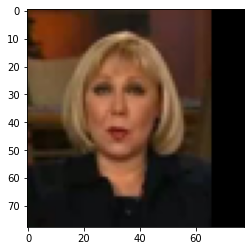

In [39]:
# Example 1
plt.imshow(X[18, :].astype('uint8'))

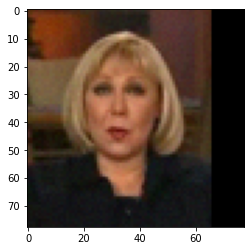

In [40]:
img_arr = shift_colors(X[18, :], shift_range=10)
plt.imshow(img_arr.astype('uint8'))

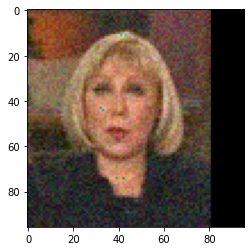

In [220]:
# Example 2
img_arr = shift_colors(X[18, :], shift_range=50)
plt.imshow(img_arr.astype('uint8'))

In [42]:
print(X.shape, Y.shape)
# Generate one pictures from each already avaible
pictures_number = 1
CS_X = np.zeros((X.shape[0] * pictures_number, new_picture_size, new_picture_size, 3))
CS_Y = np.zeros((X.shape[0] * pictures_number, 2))
for i in range(X.shape[0]):
    for j in range(pictures_number):
        CS_X[j * X.shape[0] + i, :] = shift_colors(X[i, :])
        CS_Y[j * X.shape[0] + i, :] = Y[i, :]
X = np.concatenate((X, CS_X))
Y = np.concatenate((Y, CS_Y))
print(X.shape, Y.shape)

(35450, 78, 78, 3) (35450, 2)
(70900, 78, 78, 3) (70900, 2)


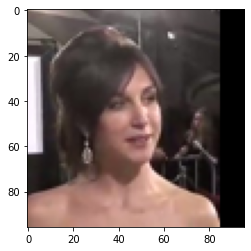

In [228]:
# Example 3
plt.imshow(X[19, :].astype('uint8'))

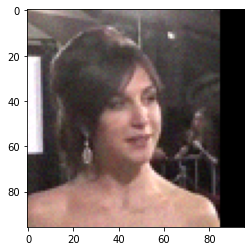

In [229]:
plt.imshow(X[19 + 8464, :].astype('uint8'))

## Save data

In [43]:
np.save(os.path.join(data_path, 'X.npy'), X)
np.save(os.path.join(data_path, 'Y.npy'), Y)

In [44]:
np.save(os.path.join(data_path, 'X_small.npy'), X[:550, :])
np.save(os.path.join(data_path, 'Y_small.npy'), Y[:550, :])